In [ ]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [ ]:
airtel_df = pd.read_csv('.//data//airtel_df.csv')
infy_df = pd.read_csv('.//data//infy_df.csv')
tcs_df = pd.read_csv('.//data//tcs_df.csv')
reliance_df = pd.read_csv('.//data//reliance_df.csv')

In [ ]:
print(airtel_df.head())
print(infy_df.head())
print(reliance_df.head())
print(tcs_df.head())

         Date       Open       High        Low      Close  Adj Close  \
0  2002-02-20  18.268200  19.691099  18.245199  19.002600  17.911358   
1  2002-02-21  19.507500  19.943501  19.278000  19.484501  18.365585   
2  2002-02-22  19.254999  20.104200  19.163200  19.943501  18.798227   
3  2002-02-25  19.874701  19.966499  19.553400  19.576300  18.452114   
4  2002-02-26  19.737000  20.287800  19.622200  19.989401  18.841490   

      Volume  
0  2351049.0  
1  1240948.0  
2   908020.0  
3   395880.0  
4   595730.0  
         Date     Open     High      Low    Close  Adj Close    Volume
0  1996-01-01  0.79492  0.79668  0.79102  0.79668  -0.000436  204800.0
1  1996-01-02  0.79492  0.79883  0.79346  0.79346  -0.000435  204800.0
2  1996-01-03  0.79883  0.79883  0.79883  0.79883  -0.000437  102400.0
3  1996-01-04  0.79102  0.79492  0.79102  0.79355  -0.000435  307200.0
4  1996-01-05  0.78418  0.78418  0.78418  0.78418  -0.000429   51200.0
         Date       Open       High        Low    C

In [ ]:
print(airtel_df.describe())
print(infy_df.describe())
print(reliance_df.describe())
print(tcs_df.describe())

              Open         High          Low        Close    Adj Close  \
count  4653.000000  4653.000000  4653.000000  4653.000000  4653.000000   
mean    278.276423   282.745707   273.027857   277.739407   267.377992   
std     131.986398   134.041134   129.518281   131.676209   128.894772   
min       9.753750     9.914400     9.478350     9.524250     8.977311   
25%     225.735992   228.352005   221.238007   225.552994   213.573166   
50%     307.437988   311.661011   302.022003   306.657990   294.134216   
75%     358.019989   364.000000   350.904999   357.446014   344.815582   
max     604.000000   611.700012   588.650024   599.150024   597.005798   

             Volume  
count  4.653000e+03  
mean   1.165717e+06  
std    7.795096e+06  
min    0.000000e+00  
25%    2.154820e+05  
50%    4.188620e+05  
75%    9.479920e+05  
max    3.044824e+08  
              Open         High          Low        Close    Adj Close  \
count  6175.000000  6175.000000  6175.000000  6175.000000  61

In [ ]:
print(airtel_df.isnull().sum())
print(infy_df.isnull().sum())
print(reliance_df.isnull().sum())
print(tcs_df.isnull().sum())

Date          0
Open         50
High         50
Low          50
Close        50
Adj Close    50
Volume       50
dtype: int64
Date           0
Open         130
High         130
Low          130
Close        130
Adj Close    130
Volume       130
dtype: int64
Date           0
Open         127
High         127
Low          127
Close        127
Adj Close    127
Volume       127
dtype: int64
Date          0
Open         20
High         20
Low          20
Close        20
Adj Close    20
Volume       20
dtype: int64


In [ ]:
airtel_df.infer_objects(copy=False)
infy_df.infer_objects(copy=False)
reliance_df.infer_objects(copy=False)
tcs_df.infer_objects(copy=False)

airtel_df.interpolate(method='linear', inplace=True)
infy_df.interpolate(method='linear', inplace=True)
reliance_df.interpolate(method='linear', inplace=True)
tcs_df.interpolate(method='linear', inplace=True)

C:\Users\prabh\AppData\Local\Temp\ipykernel_11328\492934544.py:6: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  airtel_df.interpolate(method='linear', inplace=True)
C:\Users\prabh\AppData\Local\Temp\ipykernel_11328\492934544.py:7: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  infy_df.interpolate(method='linear', inplace=True)
C:\Users\prabh\AppData\Local\Temp\ipykernel_11328\492934544.py:8: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  reliance_df.interpolate(method='linear', inplace=True)
C:\Users\prabh\AppData\Local\Temp\ipykernel_11328\492934544.py:9: FutureWarning: DataFrame.interpolate with object dtype is dep

In [ ]:
airtel_df['Date'] = pd.to_datetime(airtel_df['Date'])
infy_df['Date'] = pd.to_datetime(infy_df['Date'])
reliance_df['Date'] = pd.to_datetime(reliance_df['Date'])
tcs_df['Date'] = pd.to_datetime(tcs_df['Date'])

airtel_df["Year"], airtel_df["Month"], airtel_df["Day"] = airtel_df["Date"].dt.year, airtel_df["Date"].dt.month, airtel_df["Date"].dt.day
infy_df["Year"], infy_df["Month"], infy_df["Day"] = infy_df["Date"].dt.year, infy_df["Date"].dt.month, infy_df["Date"].dt.day
reliance_df["Year"], reliance_df["Month"], reliance_df["Day"] = reliance_df["Date"].dt.year, reliance_df["Date"].dt.month, reliance_df["Date"].dt.day
tcs_df["Year"], tcs_df["Month"], tcs_df["Day"] = tcs_df["Date"].dt.year, tcs_df["Date"].dt.month, tcs_df["Date"].dt.day

In [ ]:
airtel_x = airtel_df.drop(['Close', 'Date'], axis=1)
airtel_y = airtel_df['Close']

infy_x = infy_df.drop(['Close', 'Date'], axis=1)
infy_y = infy_df['Close']

reliance_x = reliance_df.drop(['Close', 'Date'], axis=1)
reliance_y = reliance_df['Close']

tcs_x = tcs_df.drop(['Close', 'Date'], axis=1)
tcs_y = tcs_df['Close']

In [ ]:
airtel_x = StandardScaler().fit_transform(airtel_x)
infy_x = StandardScaler().fit_transform(infy_x)
reliance_x = StandardScaler().fit_transform(reliance_x)
tcs_x = StandardScaler().fit_transform(tcs_x)

In [ ]:
airtel_x_train, airtel_x_test, airtel_y_train, airtel_y_test = train_test_split(airtel_x, airtel_y, test_size=0.2, shuffle=False)
infy_x_train, infy_x_test, infy_y_train, infy_y_test = train_test_split(infy_x, infy_y, test_size=0.2, shuffle=False)
reliance_x_train, reliance_x_test, reliance_y_train, reliance_y_test = train_test_split(reliance_x, reliance_y, test_size=0.2, shuffle=False)
tcs_x_train, tcs_x_test, tcs_y_train, tcs_y_test = train_test_split(tcs_x, tcs_y, test_size=0.2, shuffle=False)

In [ ]:
airtel_model = LinearRegression()
airtel_model.fit(airtel_x_train, airtel_y_train)

infy_model = LinearRegression()
infy_model.fit(infy_x_train, infy_y_train)

reliance_model = LinearRegression()
reliance_model.fit(reliance_x_train, reliance_y_train)

tcs_model = LinearRegression()
tcs_model.fit(tcs_x_train, tcs_y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
airtel_pred = airtel_model.predict(airtel_x_test)
infy_pred = infy_model.predict(infy_x_test)
reliance_pred = reliance_model.predict(reliance_x_test)
tcs_pred = tcs_model.predict(tcs_x_test)

In [ ]:
airtel_year = np.linspace(airtel_df["Year"].min(), airtel_df["Year"].max() + 1, airtel_y_test.shape[0])
infy_year = np.linspace(infy_df["Year"].min(), infy_df["Year"].max() + 1, infy_y_test.shape[0])
reliance_year = np.linspace(reliance_df["Year"].min(), reliance_df["Year"].max() + 1, reliance_y_test.shape[0])
tcs_year = np.linspace(tcs_df["Year"].min(), tcs_df["Year"].max() + 1, tcs_y_test.shape[0])

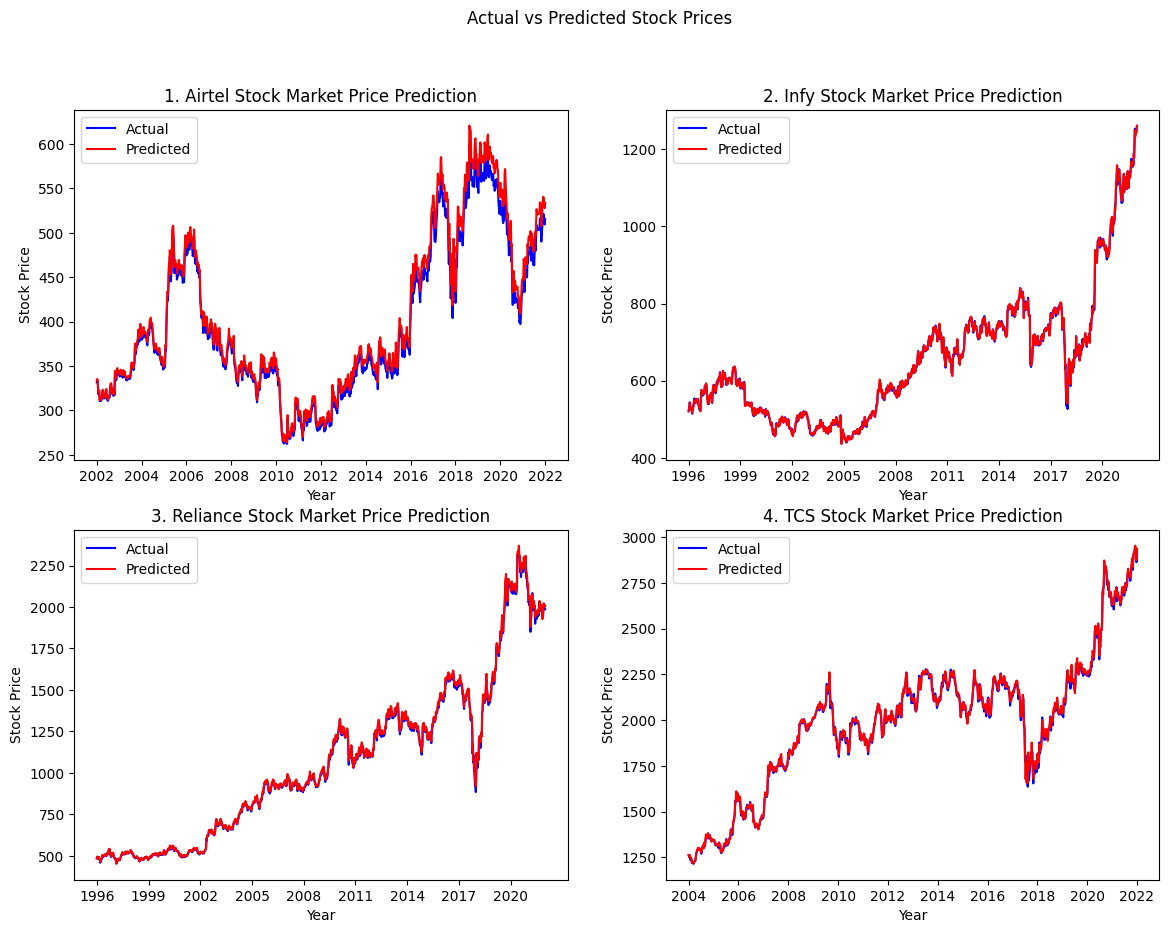

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Actual vs Predicted Stock Prices')

axs[0, 0].plot(airtel_year, airtel_y_test.values, label='Actual', color='blue')
axs[0, 0].plot(airtel_year, airtel_pred, label='Predicted', color='red')
axs[0, 0].set_title('1. Airtel Stock Market Price Prediction')
axs[0, 0].set_xticks(np.arange(airtel_year.min(), airtel_year.max() + 1, 2))
axs[0, 0].set_xlabel('Year')
axs[0, 0].set_ylabel('Stock Price')
axs[0, 0].legend()

axs[0, 1].plot(infy_year, infy_y_test.values, label='Actual', color='blue')
axs[0, 1].plot(infy_year, infy_pred, label='Predicted', color='red')
axs[0, 1].set_title('2. Infy Stock Market Price Prediction')
axs[0, 1].set_xticks(np.arange(infy_year.min(), infy_year.max() + 1, 3))
axs[0, 1].set_xlabel('Year')
axs[0, 1].set_ylabel('Stock Price')
axs[0, 1].legend()

axs[1, 0].plot(reliance_year, reliance_y_test.values, label='Actual', color='blue')
axs[1, 0].plot(reliance_year, reliance_pred, label='Predicted', color='red')
axs[1, 0].set_title('3. Reliance Stock Market Price Prediction')
axs[1, 0].set_xticks(np.arange(reliance_year.min(), reliance_year.max() + 1, 3))
axs[1, 0].set_xlabel('Year')
axs[1, 0].set_ylabel('Stock Price')
axs[1, 0].legend()

axs[1, 1].plot(tcs_year, tcs_y_test.values, label='Actual', color='blue')
axs[1, 1].plot(tcs_year, tcs_pred, label='Predicted', color='red')
axs[1, 1].set_title('4. TCS Stock Market Price Prediction')
axs[1, 1].set_xticks(np.arange(tcs_year.min(), tcs_year.max() + 1, 2))
axs[1, 1].set_xlabel('Year')
axs[1, 1].set_ylabel('Stock Price')
axs[1, 1].legend()

plt.show()